In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install setuptools

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

In [50]:
df=pd.read_csv('http://w.pul.kr/dataset/ms001.csv',encoding='euc-kr')
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,...,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,...,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,...,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,...,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df=df.dropna(axis=1)
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,남,20150511,172.1,60.5
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,남,20150415,139.7,44.5
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,남,20150520,179.0,78.9
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,남,20150421,137.0,29.2
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,남,20150423,154.9,53.5


In [52]:
df2=df.copy()
scaler=MinMaxScaler()
df2[['키','몸무게']]=scaler.fit_transform(df2[['키','몸무게']])
df2['성별']=df2['성별'].map({'남':0, '여':1})
df2['학교']=np.where(df2['학교명'].str.endswith('초등학교'),0,
                  np.where(df2['학교명'].str.endswith('고등학교'),2,1))   #초,중,고를 0,1,2로 둠
df2.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,학교
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,0,20150511,0.744509,0.388502,2
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,0,20150415,0.369942,0.249129,0
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,0,20150520,0.824277,0.548780,2
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,0,20150421,0.338728,0.115854,0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,0,20150423,0.545665,0.327526,1


In [53]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [54]:
print(df2.head())

            ID       최종가중치  학교ID      도시규모 도시규모별분석용   학년도 광역시도       시도별  \
0  Ac283남30713   68.863671  Ac28  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
1  Aa123남30304  145.957095  Aa12  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
2  Ac253남30104  107.030275  Ac25  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
3  Aa014남40116  156.358138  Aa01  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
4  Ab212남20127   94.351361  Ab21  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   

   학교급별        학교명  공학여부  학년  반  성별     건강검진일         키       몸무게  학교  
0     3     신서고등학교  남여공학   3  7   0  20150511  0.744509  0.388502   2  
1     1   서울난향초등학교  남여공학   3  3   0  20150415  0.369942  0.249129   0  
2     3  한영외국어고등학교  남여공학   3  1   0  20150520  0.824277  0.548780   2  
3     1   서울대도초등학교  남여공학   4  1   0  20150421  0.338728  0.115854   0  
4     2      불광중학교  남여공학   2  1   0  20150423  0.545665  0.327526   1  


In [55]:
X=df2[['키','몸무게','성별']]
y=df2['학교']
X.head()

,키,몸무게,성별
0,0.744509,0.388502,0
1,0.369942,0.249129,0
2,0.824277,0.548780,0
3,0.338728,0.115854,0
4,0.545665,0.327526,0


In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(train_X.shape,test_X.shape, train_y.shape, test_y.shape)


(7745, 3) (1937, 3) (7745,) (1937,)


# 인공신경망 제작

In [58]:
#인공신경망 제작
model=keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])

In [59]:
#인공신경망 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
#인공신경망 학습
print("************************TRAINING START************************")
EPOCHS=50
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(train_X,train_y,epochs=EPOCHS,validation_data=(test_X,test_y),callbacks=[early_stop])

************************TRAINING START************************
Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5067 - loss: 1.0221 - val_accuracy: 0.6820 - val_loss: 0.7080
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6993 - loss: 0.6560 - val_accuracy: 0.7233 - val_loss: 0.5957
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7308 - loss: 0.5832 - val_accuracy: 0.7233 - val_loss: 0.5766
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7289 - loss: 0.5721 - val_accuracy: 0.7155 - val_loss: 0.5807
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7339 - loss: 0.5527 - val_accuracy: 0.7279 - val_loss: 0.5594
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7304 - loss: 0.5520 - val_accuracy: 0.7269 - val_loss: 0.5583
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7378 - loss: 0.5442 - val_accuracy: 0.7305 - val_loss: 0.5607
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,735 (10.69 KB)

 Trainable params: 911 (3.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,824 (7.13 KB)

In [63]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [64]:
pred=model.predict(test_X)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [65]:
pred

array([[7.6245397e-01, 2.3302408e-01, 4.5220410e-03],
       [4.8585040e-03, 2.6923865e-01, 7.2590292e-01],
       [2.0025080e-04, 1.5438427e-01, 8.4541547e-01],
       ...,
       [9.9849236e-01, 1.5063174e-03, 1.2447798e-06],
       [3.5819502e-03, 3.3074248e-01, 6.6567558e-01],
       [6.2312587e-04, 2.2969192e-01, 7.6968497e-01]], dtype=float32)

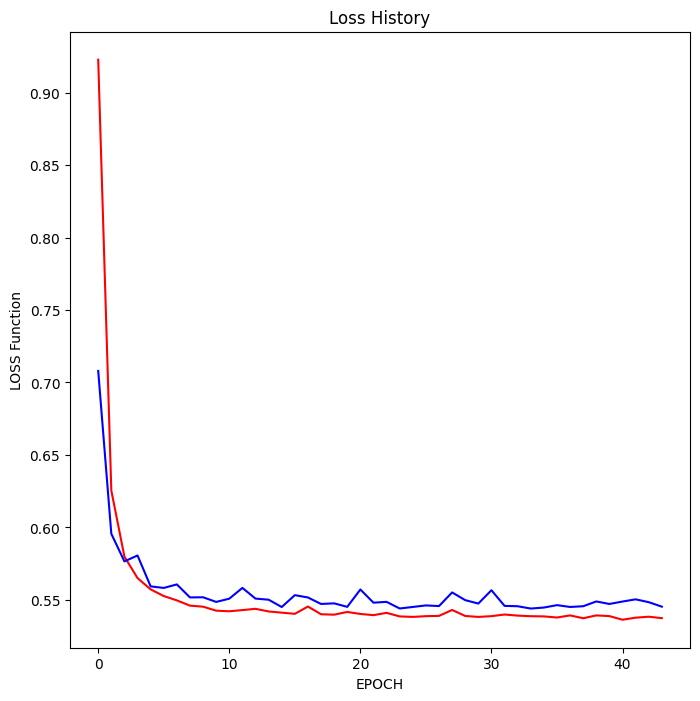

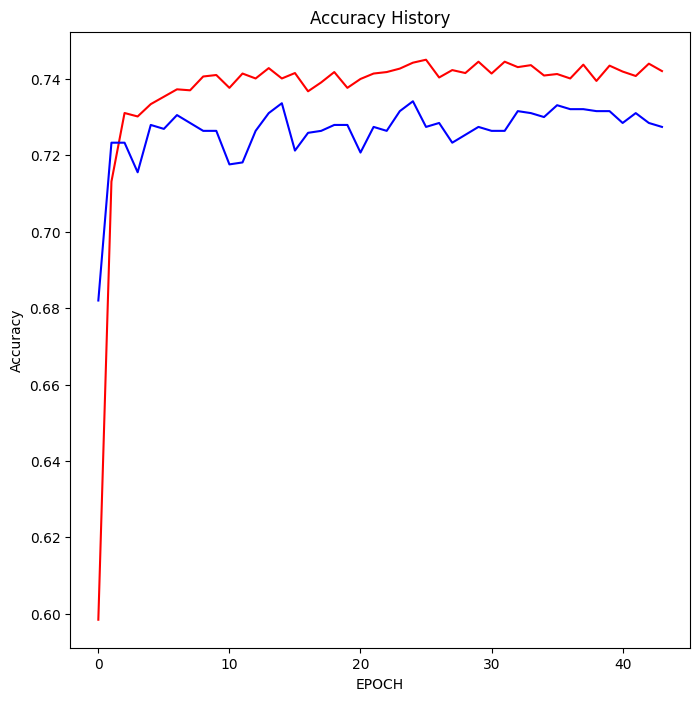

In [66]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")        #훈련 데이터의 Loss
plt.plot(validation_history, 'blue')  #검증 데이터의 Loss
fig.savefig("train_history.png")      #이미지로 저장

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")        #훈련 데이터의 Accuracy
plt.plot(validation_history, 'blue')  #검증 데이터의 Accuracy
fig.savefig("accuracy_history.png")

In [67]:
#학교 유형 매핑
school_types = {0: '초', 1: '중', 2: '고'}

#예측 결과에서 가장 높은 확률의 인덱스를 찾고 매핑
predicted_classes=np.argmax(pred,axis=1)
predicted_school_types = [school_types[i] for i in predicted_classes]

#결과 출력
predicted_school_types   #예측된 학생이 초등학교 학생인지, 중학교 학생인지, 고등학교 학생인지

['초',
 '고',
 '고',
 '초',
 '고',
 '고',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '중',
 '초',
 '중',
 '고',
 '고',
 '고',
 '고',
 '고',
 '중',
 '중',
 '초',
 '고',
 '고',
 '초',
 '고',
 '초',
 '고',
 '초',
 '초',
 '고',
 '고',
 '초',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '초',
 '초',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '중',
 '중',
 '중',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '고',
 '초',
 '고',
 '고',
 '중',
 '초',
 '중',
 '고',
 '초',
 '고',
 '초',
 '초',
 '초',
 '중',
 '고',
 '고',
 '중',
 '고',
 '고',
 '중',
 '고',
 '중',
 '초',
 '초',
 '고',
 '초',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '중',
 '초',
 '중',
 '초',
 '중',
 '중',
 '초',
 '고',
 '초',
 '초',
 '초',
 '초',
 '초',
 '중',
 '초',
 '고',
 '고',
 '중',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '고',
 '중',
 '중',
 '초',
 '중',
 '중',
 '초',
 '초',
 '중',
 '고',
 '고',
 '고',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '초',
 '초',
 '고',
 '초',
 '고',
 '중',
 '고',
 '중',
 '고',
 '고',
 '초',
 '중',
 '중',
 '고',
 '고'